# Assignment 1: Convolutional Neural Networks (CNNs)


## Import Packages


In [1]:
# Import torch packages
import torch
import torchvision as torchv

# Packages that are nice to have
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import PIL
from torchsummary import summary
from pathlib import Path

/opt/homebrew/Caskroom/miniforge/base/envs/assignment1/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/assignment1/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /opt/homebrew/Caskroom/miniforge/base/envs/assignment1/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/assignment1/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/assignment1/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/assignment1/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/assignment1/bin/../lib/libjpeg.9.dylib' (no su

## Get the Dataset


In [2]:
train_dataset = torchv.datasets.MNIST(
    root='./dataset/train',
    train=True,
    download=True,
    transform=torchv.transforms.ToTensor()
)
test_dataset = torchv.datasets.MNIST(
    root='./dataset/test',
    train=False,
    download=True,
    transform=torchv.transforms.ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



1.7%

100.0%


Extracting ./dataset/train/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./dataset/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./dataset/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./dataset/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./dataset/test/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./dataset/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./dataset/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./dataset/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/test/MNIST/raw



### What does the data look like?


In [5]:
print(train_dataset[0])
print(type(train_dataset[0]))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

A single sample of the data is a tuple of length 2. This will be the input into our convolutional neural network!


In [15]:
# First element of tuple. This is an image!
print(train_dataset[0][0].shape)
print(type(train_dataset[0][0]))

torch.Size([1, 28, 28])
<class 'torch.Tensor'>


You may not be familiar with what a "tensor" is as of now. Just think of it as a datatype similar to an array!


Now we can look at a single sample of the second element. This will be our label (or "target" in PyTorch) to compare the output of our network to in order to determine the loss or error of our network so we can tell the network how to improve the network.

Keep in mind this is can also be called the ground-truth of the input sample.


In [16]:
# Second element is just a single integer!
print(train_dataset[0][1])
print(type(train_dataset[0][1]))

5
<class 'int'>


### What are these two elements of the single sample?


- The first element is an image of shape 1x28x28 (NumberOfChanngels \* Width \* Height) representing a single handwritten digit (i.e. a number between 0 and 9).
- The second element is a single digit integer representing the handwritten digit's perceived value contained within the image.


In the first element of the tuple, we see that the shape of the image is 1x28x28. Why do we have the single 1 in the front? This is the number of color channels the image has in it. In this case, we only have one color channel conveying that this image is simply a gray scale image!


**_Q1: How many color channels does a traditional colored image have?_**


Keep in mind that this is only ONE sample of the dataset!


In [18]:
print(f'There are {len(train_dataset)} samples in the training dataset!')
print(f'There are {len(test_dataset)} samples in the test dataset!')
print(
    f'Thus we have {len(train_dataset) + len(test_dataset)} ' +
    'samples in total!\n' +
    f'That is, we have a total of {len(train_dataset) + len(test_dataset)} ' +
    'tuples containing a single grayscale image and a single digit integer!'
)

There are 60000 samples in the training dataset!
There are 10000 samples in the test dataset!
Thus we have 70000 samples in total!
That is, we have a total of 70000 tuples containing a single grayscale image and a single digit integer!


### Combine and Split the Data


We currently have two separate parts of the dataset: the training data and the testing data. For this example we will combine these two into one large dataset of 70,000 samples and then split the dataset into three new datasets: train, validation, and testing.


In [17]:
# Get the data into numpy arrays
# (convert data to numpy format to manipulate later)
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()
print(
    f'Train Images: {train_images.shape}\n' +
    f'Train Labels: {train_labels.shape}\n' +
    f'Test Images: {test_images.shape}\n' +
    f'Test Labels: {test_labels.shape}\n'
)

Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images: (10000, 28, 28)
Test Labels: (10000,)



In [20]:
# Combine the train and test dataset into one big dataset
all_images = np.concat([train_images, test_images])
all_labels = np.concat([train_labels, test_labels])
print(
    f'All Images: {all_images.shape}\n' +
    f'All Labels: {all_labels.shape}\n'
)

All Images: (70000, 28, 28)
All Labels: (70000,)



Notice! That the color channel dimension of 1 was removed! This is fine for now. We will add it back later!


So now that we have one large dataset, we split the data into the proportions we wish to use for our three separate datasets for training, validation, and testing.


In [21]:
# Split the large numpy array into smaller train, validation, and test splits
choices = np.arange(len(all_labels))
# Specify the percentages of samples each set should contain
# NOTE: The last percentage is not important here since we will just
#       use the remaining images after we take out the training and validation
#       sets.
train_perc, val_perc, test_perc = (0.7, 0.2, 0.1)
# Get the number of total samples
num_samples = len(all_labels)
# Calculate the number train samples we want
num_train = int(np.floor(num_samples * train_perc))
# Calculate the number of validation samples we want
num_val = int(np.floor(num_samples * val_perc))
# Calculate the number of test samples we want
num_test = num_samples - num_train - num_val
# Show the number of samples in each
num_train, num_val, num_test

(49000, 14000, 7000)

In [22]:
# Randomly select indices throughout the whole dataset
train_idx = np.random.choice(choices, num_train, replace=False)
# Get the set difference between the whole dataset and the chosen training
# indices
choices = np.setdiff1d(choices, train_idx)
# Now get randomly choose the validation indices
val_idx = np.random.choice(choices, num_val, replace=False)
# Similarly, get the set difference but this time the resulting difference
# is, in fact, the test set.
test_idx = np.setdiff1d(choices, val_idx)
# Show index sets
train_idx, val_idx, test_idx

(array([11655, 36219, 38164, ...,   821, 31826, 46739], shape=(49000,)),
 array([30400, 40846, 61377, ..., 63373, 16756, 29256], shape=(14000,)),
 array([   66,    74,    85, ..., 69971, 69973, 69978], shape=(7000,)))

In [24]:
# Ensure disjoint sets i.e. none of the elements overlap between the new
# three datasets of train, validation, and test.
np.intersect1d(np.intersect1d(train_idx, val_idx), test_idx)

array([], dtype=int64)

In [25]:
# Now we actually get all of the images and labels corresponding to their
# sets using the indices we randomly chose
train_images, train_labels = all_images[train_idx], all_labels[train_idx]
val_images, val_labels = all_images[val_idx], all_labels[val_idx]
test_images, test_labels = all_images[test_idx], all_labels[test_idx]

### Helper Functions and Custom Dataset Definition


In [10]:
def transform(image):
    """Perform a transform on an input image. This can include normalization,
    padding, and other transformations/augmentations.

    :param image: The input image.
    :type image: Typically a numpy array.
    :return: A new transformed image.
    :rtype: _type_
    """
    x = np.pad(image, pad_width=2)
    x = np.reshape(x, (1, 32, 32))
    x = torch.Tensor(x / 255.0)
    return x


def target_transform(label):
    """Perform transformations on the label (i.e. "target").

    :param label: An input integer in this case
    :type label: A number that we should typecast to integer.
    :return: A transformed label.
    :rtype: int
    """
    x = int(label)
    return x


class MNIST_Dataset(torch.utils.data.Dataset):
    """Create a custom PyTorch dataset with all of the necessary functions to
    properly work with other PyTorch operations/functions.
    """

    def __init__(
        self,
        images,
        labels,
        transform=transform,
        target_transform=target_transform
    ):
        """The constructor for the class. Initialize variables.

        :param images: A group of images.
        :param labels: A group of labels.
        :param transform: Transform function to apply to images, 
            defaults to transform
        :type transform: function, optional
        :param target_transform: Transform function to apply to the labels,
            defaults to target_transform
        :type target_transform: function, optional
        """
        self.images = images
        self.labels = labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        """Get the length of the dataset.

        :return: The length of the labels i.e. the number of elements in the
            dataset.
        :rtype: int
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """Get a single element of the dataset via its index and perform the
        necessary transforms upon it.

        :param idx: The index of the element to retrieve.
        :type idx: int
        :return: A tuple grouping the image and the label.
        :rtype: tuple
        """
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [11]:
# Use our custom dataset definition class to wrap our dataset for use with other
# PyTorch tools i.e. the PyTorch dataloader.
train_dataset = MNIST_Dataset(
    train_images, train_labels, transform=transform, target_transform=target_transform)
val_dataset = MNIST_Dataset(
    val_images, val_labels, transform=transform, target_transform=target_transform)
test_dataset = MNIST_Dataset(
    test_images, test_labels, transform=transform, target_transform=target_transform)

## Visualize the Data


Now let's pause and analyze our data.


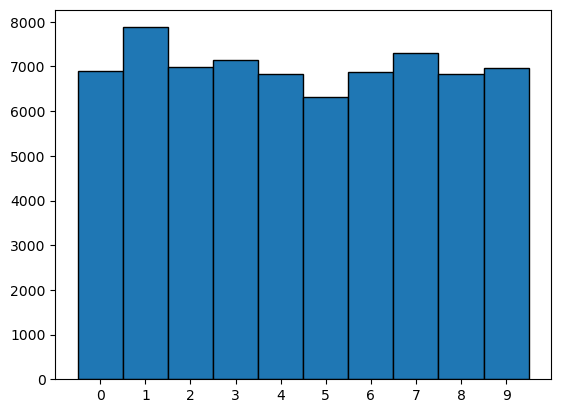

In [12]:
# Histogram showing the frequency of each class in the dataset
plt.hist(all_labels, bins=np.arange(11) - 0.5, edgecolor='black')
plt.xticks(range(10))
plt.show()

We can see that we have mixed distribution of frequencies among the 10 classes of handwritten digits with handwritten 1s having the most samples and the 5s having the least samples.


**_Q2: What happens if our distribution is very unbalanced meaning we have widely different quantities of classes?_**


Now, if we look at the distribution over the train, validation, and test sets, we can see that the distributions are roughly proportional to what we saw previously when the all of the data was contained within a single large dataset.


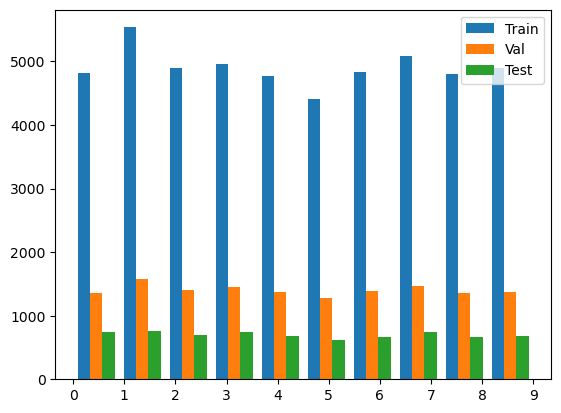

In [13]:
# Frequencies of each class in the 3 separate datasets
labels = np.unique(train_labels)
plt.hist([train_labels, val_labels, test_labels])
plt.xticks(labels)
plt.legend(['Train', 'Val', 'Test'])

Now we can get an idea of what our data actually looks like. Here, we have printed a single sample of each class and displayed their corresponding label above them.


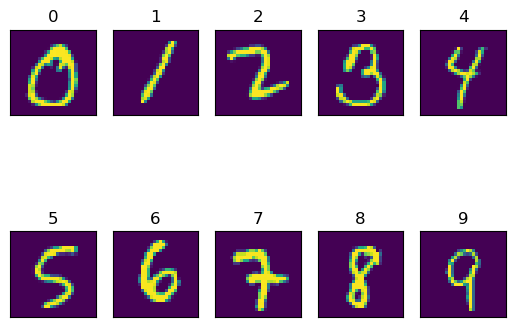

In [14]:
# Displaying one sample of each class
visualization_samples = []
plt.subplot(2, 5, 1)
for i in range(10):
    indices = np.where(train_labels == i)[0]
    rand_idx = indices[np.random.randint(0, len(indices) - 1)]
    plt.subplot(2, 5, i+1)
    plt.imshow(np.squeeze(train_images[rand_idx]))
    plt.yticks([])
    plt.xticks([])
    plt.title(i)

## Create the Dataloaders


In many cases our entire dataset may not fit entirely in memory (i.e. RAM). In our case of MNIST, this typically isn't a problem, but for larger datasets and higher dimensional data (i.e. ImageNet datasets), it is common that we need a way to load our data such that it fits in memory.

We can customize the code in the MNIST_Dataset class to allow use to only read data from the disk (Hard Drive or Solid State Drive) when needed. This can be seen in the PyTorch examples of the Dataset and Dataloader documentation/tutorials: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

In this case, we are not concerned with memory limitations, unless the system you are running this tutorial on is extremely limited in memory. Thus we have the entire dataset loaded into memory and can freely manipulate it.

In many cases, it is much more efficient to use data batching to batch our data when training to speed up training. Instead of inputting a single image, computing the loss, and then backpropogating the error and adjusting the weights, we can perform the forward pass (i.e. input) several images at once and then compute the loss on those samples together and then backpropogate their error.


**_Q3: What do we mean by "train faster" or "more efficiently" here? That is what is faster or more efficient?_**


### Parameters


In [15]:
# In this tutorial, we will use a batch size of 32 whilst training
BATCH_SIZE = 32

In [16]:
# Here we initialize the Dataloaders, set the batch size to load BATCH_SIZE
# samples at a time and also perform a random shuffle of the samples within
# each set of data.
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

**_Q4: Why do we shuffle the data even within the randomly chosen samples in each dataset?_**


## Create the CNN Model


Here we instantiate two CNN models both being based off of Yann LeCun et. al.'s LeNet-5 CNN proposed in their publication "Gradient-Based Learning Applied to Document Recognition" circa 1998.


### Parameters


In [17]:
# We have 10 different classes of data we want to differentiate between
# (i.e. the handwritten single digit number zero thru nine)
NUM_CLASSES = 10

### Classic LeNet-5


Here we define a close-to-classical version of LeNet-5 which is very similar to what Yann LeCun et. al. proposed in 1998.


In [18]:
class OGLeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.conv1 = torch.nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.avgpool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.avgpool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(400, 120)
        self.linear2 = torch.nn.Linear(120, 84)
        self.linear3 = torch.nn.Linear(84, out_features=NUM_CLASSES)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.functional.F.tanh(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = torch.functional.F.tanh(x)
        x = self.avgpool2(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = torch.functional.F.tanh(x)
        x = self.linear2(x)
        x = torch.functional.F.tanh(x)
        x = self.linear3(x)
        return x

### Inspect the Original LeNet-5 Model


In [19]:
original_lenet5 = OGLeNet5()
summary(original_lenet5, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           156
├─AvgPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Flatten: 1-5                           [-1, 400]                 --
├─Linear: 1-6                            [-1, 120]                 48,120
├─Linear: 1-7                            [-1, 84]                  10,164
├─Linear: 1-8                            [-1, 10]                  850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           156
├─AvgPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Flatten: 1-5                           [-1, 400]                 --
├─Linear: 1-6                            [-1, 120]                 48,120
├─Linear: 1-7                            [-1, 84]                  10,164
├─Linear: 1-8                            [-1, 10]                  850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29

### Define a More Modern LeNet-5


Here we provide a more modernize version of LeNet-5 with layers and operations that were not yet available or discovered at the time of LeNet-5's creation.


In [20]:
class ModernLeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.conv1 = torch.nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.batchnorm1 = torch.nn.BatchNorm2d(6)
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.batchnorm2 = torch.nn.BatchNorm2d(16)
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(400, 120)
        self.linear2 = torch.nn.Linear(120, 84)
        self.linear3 = torch.nn.Linear(84, out_features=NUM_CLASSES)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = torch.functional.F.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = torch.functional.F.relu(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = torch.functional.F.relu(x)
        x = self.linear2(x)
        x = torch.functional.F.relu(x)
        x = self.linear3(x)
        return x

### Inspect the Modernized LeNet-5 Model


In [21]:
modern_lenet5 = ModernLeNet5()
summary(modern_lenet5, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           156
├─BatchNorm2d: 1-2                       [-1, 6, 28, 28]           12
├─MaxPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─BatchNorm2d: 1-5                       [-1, 16, 10, 10]          32
├─MaxPool2d: 1-6                         [-1, 16, 5, 5]            --
├─Flatten: 1-7                           [-1, 400]                 --
├─Linear: 1-8                            [-1, 120]                 48,120
├─Linear: 1-9                            [-1, 84]                  10,164
├─Linear: 1-10                           [-1, 10]                  850
Total params: 61,750
Trainable params: 61,750
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.24
Estimated Total Size (MB): 0.34


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           156
├─BatchNorm2d: 1-2                       [-1, 6, 28, 28]           12
├─MaxPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─BatchNorm2d: 1-5                       [-1, 16, 10, 10]          32
├─MaxPool2d: 1-6                         [-1, 16, 5, 5]            --
├─Flatten: 1-7                           [-1, 400]                 --
├─Linear: 1-8                            [-1, 120]                 48,120
├─Linear: 1-9                            [-1, 84]                  10,164
├─Linear: 1-10                           [-1, 10]                  850
Total params: 61,750
Trainable params: 61,750
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.24
Estimated Total Size (MB): 0.34

**_Q5: What are the differences between these two models in their architectures?_**


## Setup the Loss Functions and Optimizer


### Paremeters


In [22]:
# This is our learning rate for both models
LEARNING_RATE = 0.001

In [23]:
# Setup our loss function
loss = torch.nn.CrossEntropyLoss()

# Setup an optimizer for each of the two models
optim_original_lenet5 = torch.optim.Adam(
    original_lenet5.parameters(), lr=LEARNING_RATE)
optim_modern_lenet5 = torch.optim.Adam(
    modern_lenet5.parameters(), lr=LEARNING_RATE)

## Train the CNN Model


### Parameters


In [24]:
# Define the number of training epochs to loop of the entire dataset
NUM_EPOCHS = 10
# Determine if we should use
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
def train_model(
    train_dataloader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    loss_function: torch.nn.CrossEntropyLoss,
    optimizer: torch.optim.Adam,
    num_epochs: int,
    device: str,
    val_dataloader: torch.utils.data.DataLoader = None,
    model_save_path: Path = Path('./models')
):
    """Training loop which iterates over every image in the training dataset,
    performs the forward pass, computes the loss, and then performs the
    backwards pass.

    See: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

    :param train_dataloader: Dataloader for training data.
    :type train_dataloader: torch.utils.data.DataLoader
    :param model: The model to train.
    :type model: torch.nn.Module
    :param loss_function: The loss function to compute the error.
    :param optimizer: The optimizer to use during training.
    :param num_epochs: Number of epochs to perform training over.
    :type num_epochs: int
    :param device: Device string to perform the training computations on.
    :type device: str
    :param val_dataloader: Dataloader for validation data, defaults to None
    :type val_dataloader: torch.utils.data.DataLoader, optional
    :param model_save_path: Directory where to save the best model to.
    :type model_save_path: pathlib.Path

    # TODO: Implement top-k best model saves
    """
    # Initialize lists and variables for storing metrics
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    epoch_train_loss = 0.0
    epoch_train_acc = 0.0
    epoch_val_loss = 0.0
    epoch_val_acc = 0.0
    max_train_acc = (0.0, 0)
    min_train_loss = (0.0, 0)
    max_val_acc = (0.0, 0)
    min_val_loss = (0.0, 0)

    # Create the save path for the model
    if not model_save_path.exists():
        model_save_path.mkdir()

    # Total number batches in training set
    total_steps = len(train_dataloader)

    # Perform training loop
    for epoch in range(num_epochs):
        # Enable model training
        model.train(True)

        for i, (images, labels) in enumerate(train_dataloader):
            # Move the data to the desired training device
            images = images.to(device)

            # Perform the forward pass
            outputs = model(images)

            # Compute the loss
            loss = loss_function(outputs, labels)

            # TODO: Add the loss to the running epoch loss
            epoch_train_loss += loss.item()

            # TODO: Compute accuracy metric
            # NOTE: Take in as a function for simplicity!

            # Zero the gradients
            optimizer.zero_grad()

            # Perform the backwards pass (i.e. backpropogate the error)
            loss.backward()

            # Optimize
            optimizer.step()

            # Done with batch, print stats every 500 batches
            if (i+1) % 256 == 0:
                print(
                    f'TRAINING --> Epoch: {epoch}/{num_epochs}, ' +
                    f'Step: {i+1}/{total_steps}, ' +
                    f'Loss: {loss.item()}'
                )

        # Print the final stats
        print(
            f'TRAINING --> Epoch: {epoch}/{num_epochs}, ' +
            f'Step: {i+1}/{total_steps}, ' +
            f'Loss: {loss.item()}'
        )
        # End of epoch compute total epoch metrics
        epoch_train_loss = epoch_train_loss / (i + 1)
        epoch_train_acc = epoch_train_acc / (i + 1)

        # Update the best metrics
        min_train_loss = (np.min(epoch_train_loss, min_train_loss), epoch)
        max_train_acc = (np.max(epoch_train_acc, max_train_acc), epoch)

        # Record the accuracy and loss
        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)

        # Now we run over the validation dataset without training
        if val_dataloader:
            # Disable the gradient calculations and updates
            with torch.no_grad():
                for i, (images, labels) in enumerate(val_dataloader):
                    images.to(device)
                    outputs = model(images)
                    loss = loss_function(outputs)

        # End of epoch compute total epoch metrics
        epoch_val_loss = epoch_val_loss / (i + 1)
        epoch_val_acc = epoch_val_acc / (i + 1)

        # Update the best metrics
        min_val_loss = (np.min(epoch_val_loss, min_val_loss), epoch)
        max_val_acc = (np.max(epoch_val_acc, max_val_acc), epoch)

        # Record the accuracy and loss
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)

        if epoch_val_loss < min_val_loss[0]:
            print(
                'LOG --> Model with better val_loss of ' +
                f'{epoch_val_loss} < {min_val_loss[0]} saving to:\n' +
                f'{model_save_path}'
            )
            min_val_loss = (epoch_val_loss, epoch)
            torch.save(model.state_dict(), model_save_path)

        return (train_losses, train_accs, val_losses, val_accs)

NameError: name 'Path' is not defined

**_Q6: What is the purpose of the loss function?_**

**_Q7: What is validation doing?_**

**_Q8: Why do we perform validation and not just use the training metrics?_**


In [26]:
# Train the original version of LeNet5
original_lenet5.to(DEVICE)
train_model(train_dataloader, original_lenet5,
            loss, optim_original_lenet5, NUM_EPOCHS, DEVICE)

TRAINING --> Epoch: 0/10, Step: 500/1532, Loss: 0.3008445203304291
TRAINING --> Epoch: 0/10, Step: 1000/1532, Loss: 0.1470094472169876
TRAINING --> Epoch: 0/10, Step: 1500/1532, Loss: 0.3648360073566437
TRAINING --> Epoch: 1/10, Step: 500/1532, Loss: 0.13600768148899078
TRAINING --> Epoch: 1/10, Step: 1000/1532, Loss: 0.16328948736190796
TRAINING --> Epoch: 1/10, Step: 1500/1532, Loss: 0.11392730474472046
TRAINING --> Epoch: 2/10, Step: 500/1532, Loss: 0.0883319079875946
TRAINING --> Epoch: 2/10, Step: 1000/1532, Loss: 0.11061844974756241
TRAINING --> Epoch: 2/10, Step: 1500/1532, Loss: 0.02307106927037239
TRAINING --> Epoch: 3/10, Step: 500/1532, Loss: 0.02267497405409813
TRAINING --> Epoch: 3/10, Step: 1000/1532, Loss: 0.0014593696687370539
TRAINING --> Epoch: 3/10, Step: 1500/1532, Loss: 0.06657955795526505
TRAINING --> Epoch: 4/10, Step: 500/1532, Loss: 0.0008674622513353825
TRAINING --> Epoch: 4/10, Step: 1000/1532, Loss: 0.002181149087846279
TRAINING --> Epoch: 4/10, Step: 1500/1

In [27]:
# Train the modern version of LeNet5
modern_lenet5.to(DEVICE)
train_model(train_dataloader, modern_lenet5,
            loss, optim_modern_lenet5, NUM_EPOCHS, DEVICE)

TRAINING --> Epoch: 0/10, Step: 500/1532, Loss: 0.05643410608172417
TRAINING --> Epoch: 0/10, Step: 1000/1532, Loss: 0.01413065567612648
TRAINING --> Epoch: 0/10, Step: 1500/1532, Loss: 0.005406002514064312
TRAINING --> Epoch: 1/10, Step: 500/1532, Loss: 0.053792811930179596
TRAINING --> Epoch: 1/10, Step: 1000/1532, Loss: 0.018589045852422714
TRAINING --> Epoch: 1/10, Step: 1500/1532, Loss: 0.002499380148947239
TRAINING --> Epoch: 2/10, Step: 500/1532, Loss: 0.09511638432741165
TRAINING --> Epoch: 2/10, Step: 1000/1532, Loss: 0.011492110788822174
TRAINING --> Epoch: 2/10, Step: 1500/1532, Loss: 0.10855165868997574
TRAINING --> Epoch: 3/10, Step: 500/1532, Loss: 0.025900844484567642
TRAINING --> Epoch: 3/10, Step: 1000/1532, Loss: 0.06985034048557281
TRAINING --> Epoch: 3/10, Step: 1500/1532, Loss: 0.018113411962985992
TRAINING --> Epoch: 4/10, Step: 500/1532, Loss: 0.0018130568787455559
TRAINING --> Epoch: 4/10, Step: 1000/1532, Loss: 0.01271965354681015
TRAINING --> Epoch: 4/10, Step

**_Q8: In terms of validation accuracy, which model is the best?_**


## Graphing the Accuracy and Loss


**_Q9: Is the model under-fitting or over-fitting?_**


## Test the Model


In [ ]:
def test_model():
    pass

#### Q10: How does the test loss and accuracy compare to the best training and validation metrics?
